In [3]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_final.csv')
df.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
0,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,327480,215011,172551,196756,177694,80992,13773,3,0,0
1,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,61291,43557,32792,27539,19267,7874,1058,1,0,0
2,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,85337,64419,65838,72636,74202,45555,7559,3,0,0
3,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,133358,62654,51239,53658,42819,15754,3171,2,0,0
4,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,210532,101581,65184,55202,41572,18845,3463,6,0,0


### [1] 승차 인원이 가장 많은 역은?

In [7]:
df['합계'] = df[df.columns[4:]].sum(axis = 1)
df.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
0,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,215011,172551,196756,177694,80992,13773,3,0,0,2408376
1,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,43557,32792,27539,19267,7874,1058,1,0,0,933338
2,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,64419,65838,72636,74202,45555,7559,3,0,0,1060476
3,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,62654,51239,53658,42819,15754,3171,2,0,0,852909
4,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,101581,65184,55202,41572,18845,3463,6,0,0,1629379


지하철역별 월평균 승차 인원

In [13]:
df_mean = df.groupby('지하철역')[['합계']].mean().reset_index().rename(columns={'합계' : '월평균'}).sort_values('월평균', ascending=False)
df_mean.head()

,지하철역,월평균
0,강남,2.475218e+06
42,잠실,2.185502e+06
49,홍대입구,1.895644e+06
27,신림,1.815902e+06
4,구로디지털단지,1.656332e+06


In [14]:
fig = px.bar(data_frame=df_mean, x='지하철역', y='월평균', title='지하철역별 월평균 승차인원')
fig.show()

### [2] 연도별 또는 월별 승차 인원 추이에 차이가 있는가?

In [18]:
year_sum = df.query('연도 <= 2022').groupby('연도')[['합계']].sum().reset_index()
year_sum

,연도,합계
0,2018,556124147
1,2019,559488134
2,2020,397139151
3,2021,391591285
4,2022,441861856


In [19]:
fig1 = px.line(data_frame=year_sum, x='연도', y='합계', title='연도별 승차 인원 추이')
fig1.show()

In [20]:
month_sum = df.query('연도 <= 2022').groupby('월')[['합계']].sum().reset_index()
month_sum

,월,합계
0,1,197568705
1,2,172253236
2,3,193395303
3,4,196594379
4,5,204107190
5,6,198015879
6,7,202871770
7,8,189574073
8,9,181278072
9,10,203345066


In [21]:
fig2 = px.line(data_frame=month_sum, x='월', y='합계', title='월별 승차 인원 추이')
fig2.show()

### [3] 시간대별 가장 승차인원이 많은 역은?

In [33]:
df = pd.read_csv('../data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_final.csv')

top10 = df_mean.sort_values('월평균', ascending=False).head(10)['지하철역']
top10_mean_hour = df.query('지하철역 in @top10').groupby('지하철역')[df.columns[4:]].mean()
top10_mean_hour.columns = [i[:3] for i in top10_mean_hour.columns]
top10_mean_hour

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,199.761194,11267.805970,20091.656716,40044.029851,64827.731343,54185.761194,54050.656716,72620.477612,92869.746269,115656.552239,...,343752.835821,223735.164179,178879.910448,216217.447761,207535.313433,83942.656716,12218.492537,41.925373,10.014925,0.626866
구로디지털단지,251.492537,39288.597015,52406.089552,137133.253731,182999.328358,115665.313433,68659.567164,61427.626866,66485.970149,68082.552239,...,223309.611940,115340.179104,69854.582090,60133.388060,46033.656716,19676.313433,2521.895522,11.776119,1.343284,0.119403
삼성,165.776119,4758.522388,7508.895522,15993.925373,21927.223881,22378.268657,24176.477612,35510.402985,45498.417910,60130.477612,...,294941.119403,168624.970149,123201.343284,105947.029851,71970.358209,19138.029851,2394.388060,59.761194,29.626866,0.552239
서울대입구,4147.731343,28407.373134,42981.582090,125993.507463,180685.805970,119475.805970,68434.402985,61263.716418,66588.074627,71341.164179,...,95358.582090,59846.805970,50127.925373,52080.597015,46056.686567,21462.447761,2779.701493,10.223881,2.283582,0.208955
선릉,102.313433,4914.492537,11078.328358,21083.328358,32790.985075,31822.820896,34649.179104,45507.268657,53924.343284,63801.223881,...,283547.059701,143360.208955,89939.089552,91230.776119,73719.223881,25119.850746,3186.000000,10.343284,2.298507,0.179104
신도림,3361.597015,35786.268657,50420.179104,134114.179104,140965.089552,89916.074627,61494.925373,60289.582090,68699.716418,72645.552239,...,134345.716418,81201.895522,68743.791045,70103.014925,52677.746269,21723.238806,2043.597015,15.716418,1.597015,0.119403
신림,284.044776,39889.641791,75300.283582,204526.492537,305087.701493,182738.835821,98890.149254,82922.119403,87595.701493,84726.820896,...,93013.238806,63213.104478,52872.417910,51414.462687,45214.208955,22744.761194,3191.626866,18.194030,2.238806,0.268657
역삼,44.149254,3807.164179,8615.835821,14899.805970,25531.537313,23781.820896,24348.492537,32903.552239,40367.059701,49070.597015,...,274455.746269,141883.850746,83333.000000,84076.910448,58585.552239,21395.791045,2791.358209,5.835821,1.208955,0.104478
잠실,92.358209,12148.671642,46134.417910,115525.567164,166209.074627,120828.656716,81041.298507,81278.716418,90041.104478,100344.522388,...,231972.447761,159950.358209,157380.462687,137989.805970,100085.656716,30282.104478,3182.029851,24.805970,2.179104,0.104478


In [34]:
top10_mean_hour.style.background_gradient(cmap = 'pink_r', axis = None).format('{:.0f}')

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


In [36]:
# 지하철 역 별
top10_mean_hour.style.background_gradient(cmap = 'pink_r', axis = 1).format('{:.0f}')

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


### [4] 지하철역 시간대별 인원 유형 군집화
- 승차 인원으로 유형 군집화

In [51]:
hour_mean = df.groupby('지하철역')[df.columns[4:]].mean()
hour_mean.columns = [i[:3] for i in hour_mean.columns]
hour_mean_pct = hour_mean.div(hour_mean.sum(axis = 1), axis = 0)

In [52]:
hour_mean_pct.head()

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,0.000081,0.004552,0.008117,0.016178,0.026191,0.021891,0.021837,0.029339,0.037520,0.046726,...,0.138878,0.090390,0.072268,0.087353,0.083845,0.033913,0.004936,0.000017,4.046079e-06,2.532568e-07
강변,0.000024,0.008291,0.025803,0.077732,0.113357,0.083293,0.064157,0.059162,0.057255,0.055563,...,0.068137,0.052754,0.042133,0.035969,0.024721,0.009363,0.001064,0.000013,8.376464e-07,0.000000e+00
건대입구,0.000273,0.015434,0.020333,0.048942,0.085799,0.057246,0.034565,0.033542,0.039427,0.043753,...,0.081112,0.062243,0.063965,0.074578,0.072592,0.039948,0.005509,0.000024,3.401257e-06,2.574657e-07
교대,0.000024,0.002824,0.013362,0.027392,0.039924,0.032422,0.030538,0.037045,0.040450,0.049797,...,0.155522,0.076263,0.059917,0.066571,0.056303,0.019653,0.003025,0.000008,1.223232e-06,4.828549e-08
구로디지털단지,0.000152,0.023720,0.031640,0.082793,0.110485,0.069832,0.041453,0.037087,0.040140,0.041104,...,0.134822,0.069636,0.042174,0.036305,0.027793,0.011879,0.001523,0.000007,8.109990e-07,7.208880e-08


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

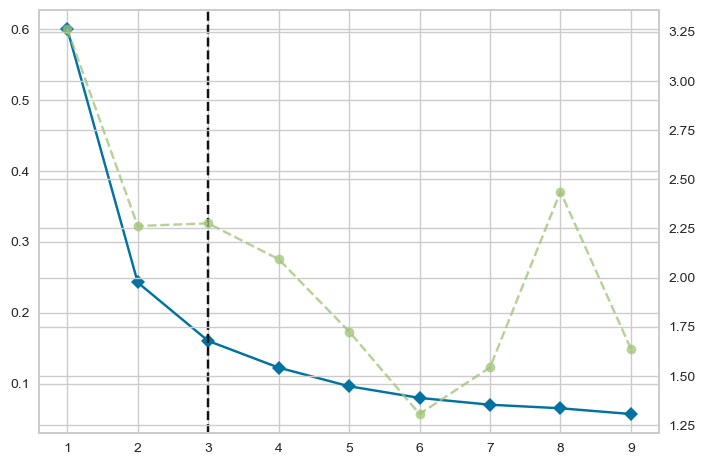

In [57]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10))
visualizer.fit(hour_mean_pct)

In [58]:
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(hour_mean_pct)
hour_mean_pct['cluster'] = model.fit_predict(hour_mean_pct).astype(str)

In [62]:
hour_mean_pct[['08시', '18시', 'cluster']].reset_index()

,지하철역,08시,18시,cluster
0,강남,0.026191,0.138878,1
1,강변,0.113357,0.068137,2
2,건대입구,0.085799,0.081112,0
3,교대,0.039924,0.155522,1
4,구로디지털단지,0.110485,0.134822,0
5,구의,0.170756,0.065635,2
6,낙성대,0.157552,0.065733,2
7,당산,0.107653,0.114429,0
8,대림,0.129109,0.078264,2
9,도림천,0.093890,0.102425,0


In [65]:
fig3 = px.scatter(data_frame=hour_mean_pct[['08시', '18시', 'cluster']].reset_index(),
                  x='08시', y='18시', color='cluster',
                  title = '시간대별 승차 인원 비중 군집화',
                  hover_data=['지하철역'])
fig3.show()

In [83]:
for i in range(k):
    print(f'cluster {i}')
    print(list(hour_mean_pct.query(f'cluster == "{i}"').index))

cluster 0
['건대입구', '구로디지털단지', '당산', '도림천', '문래', '방배', '사당', '신당', '신도림', '신설동', '신촌', '영등포구청', '왕십리', '이대', '잠실', '종합운동장', '충정로', '합정', '홍대입구']
cluster 1
['강남', '교대', '동대문역사문화공원', '뚝섬', '삼성', '서초', '선릉', '성수', '시청', '역삼', '을지로3가', '을지로4가', '을지로입구', '한양대']
cluster 2
['강변', '구의', '낙성대', '대림', '봉천', '상왕십리', '서울대입구', '신답', '신대방', '신림', '신정네거리', '아현', '양천구청', '용답', '용두', '잠실나루', '잠실새내']


- 0번 군집  :   직장, 주거단지, 학교 등 고루 분포한 중간 지역
- 1번 군집  :   직장이 많은 지역, 퇴근이 몰리는 지역
- 2번 군집  :   주거 지역, 출근이 몰리는 지역

### [5] 지도에 분석 결과 시각화

- 8시 승차 인원과 18시 승차 인원을 지도에 시각화

- 지하철역별 위도 경도 데이터 전처리

In [86]:
coordinate = pd.read_csv('../data/서울시 역사마스터 정보.csv', encoding = 'cp949')
coordinate.head()

,역사_ID,역사명,호선,위도,경도
708,250,용두(동대문구청),2호선,37.574028,127.038091
709,249,신정네거리,2호선,37.520074,126.852912
710,248,양천구청,2호선,37.512398,126.865819
711,247,도림천,2호선,37.514287,126.882768
712,246,신설동,2호선,37.574747,127.024932


In [88]:
coordinate = coordinate.query('호선 == "2호선"')
coordinate['역사명'] = [i[0] for i in coordinate['역사명'].str.split('(')]
coordinate.rename(columns = {'역사명' : '지하철역'}, inplace = True)
coordinate.head()

,역사_ID,지하철역,호선,위도,경도
708,250,용두,2호선,37.574028,127.038091
709,249,신정네거리,2호선,37.520074,126.852912
710,248,양천구청,2호선,37.512398,126.865819
711,247,도림천,2호선,37.514287,126.882768
712,246,신설동,2호선,37.574747,127.024932


In [94]:
hour_mean_merge = hour_mean.reset_index()[['지하철역', '08시', '18시']]
coordinate_merge = coordinate[['지하철역', '위도', '경도']]

hour_mean_coor = pd.merge(hour_mean_merge, coordinate_merge, on = '지하철역')
hour_mean_coor

,지하철역,08시,18시,위도,경도
0,강남,64827.731343,343752.835821,37.497990,127.027912
1,강변,119168.985075,71631.000000,37.535095,127.094681
2,건대입구,94501.731343,89339.671642,37.540373,127.069191
3,교대,37022.164179,144218.925373,37.493961,127.014667
4,구로디지털단지,182999.328358,223309.611940,37.485266,126.901401
5,구의,112258.820896,43149.910448,37.537077,127.085916
6,낙성대,125625.074627,52412.388060,37.476930,126.963693
7,당산,58876.074627,62581.805970,37.534946,126.902767
8,대림,95339.776119,57793.552239,37.493243,126.894932
9,도림천,3241.298507,3535.955224,37.514287,126.882768


In [95]:
hour_mean_coor['cluster'] = model.fit_predict(hour_mean_pct).astype(str)
hour_mean_coor.head()

,지하철역,08시,18시,위도,경도,cluster
0,강남,64827.731343,343752.835821,37.497990,127.027912,2
1,강변,119168.985075,71631.000000,37.535095,127.094681,1
2,건대입구,94501.731343,89339.671642,37.540373,127.069191,0
3,교대,37022.164179,144218.925373,37.493961,127.014667,2
4,구로디지털단지,182999.328358,223309.611940,37.485266,126.901401,0


In [ ]:
# !pip install folium

In [98]:
import folium
from folium import plugins  # 히트맵 작성위해

In [109]:
center = [37.541, 126.986]  # 서울 중간

m = folium.Map(location=center, zoom_start=12)
m

In [110]:
m.add_child(plugins.HeatMap(zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['08시'])))

In [111]:
m.add_child(plugins.HeatMap(zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['18시'])))

승차 인원 유형을 지도에 시각화

In [114]:
for idx in hour_mean_coor.index:
    lat = hour_mean_coor.loc[idx, '위도']
    long = hour_mean_coor.loc[idx, '경도']
    title = hour_mean_coor.loc[idx, '지하철역']

    if hour_mean_coor.loc[idx, 'cluster'] == '0':
        color = '#000000'
    elif hour_mean_coor.loc[idx, 'cluster'] == '1':
        color = '#3A01DF'
    else:
        color = '#DF0101'
    
    folium.CircleMarker([lat, long],
                        radius = 18,
                        color = color,
                        fill = color,
                        tooltip = title).add_to(m)
m